In [8]:
import librosa
import glob
from DataHelpers import LoadDolphinData

In [15]:
loader = LoadDolphinData()
wavs = loader.load_wavs()
ids = loader.get_ids(wavs)
wavs, ids

(['BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_01.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_02.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_03.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_04.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_05.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_06.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_07.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_08.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_09.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_10.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_11.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_12.wav',
  'BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_13.wav',

In [18]:
def gen_spec(s):
    S = librosa.stft(s, n_fft=1024, hop_length=256)
    D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    return D

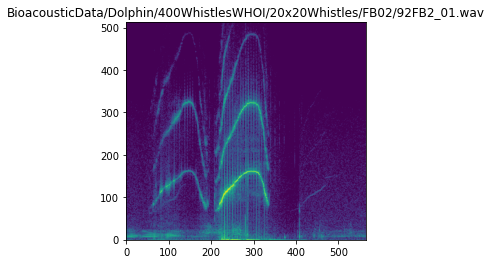

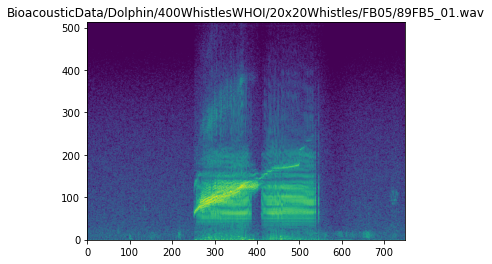

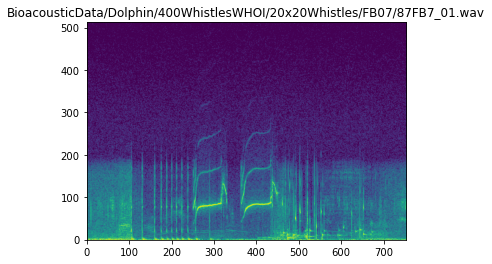

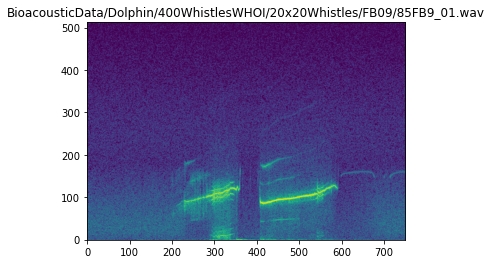

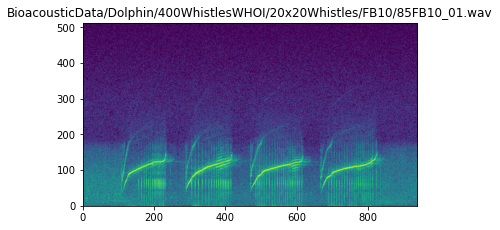

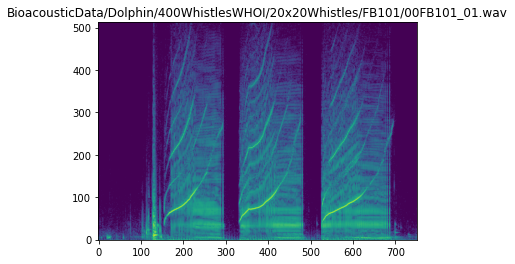

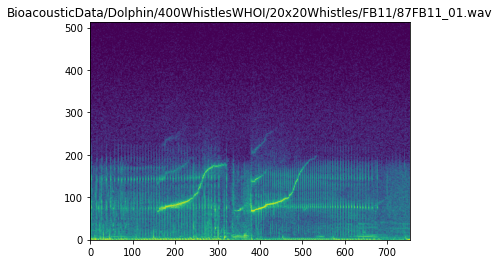

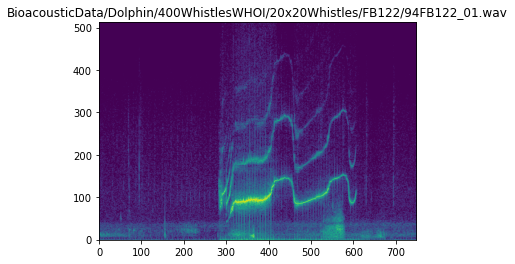

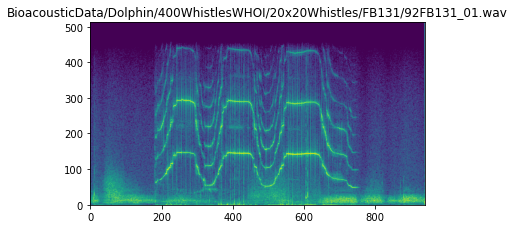

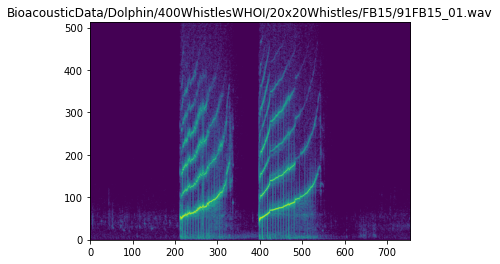

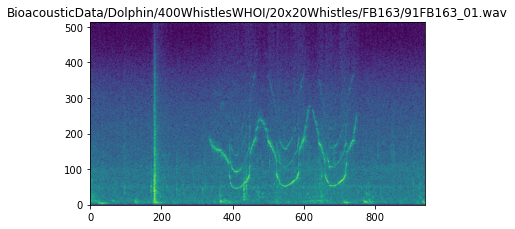

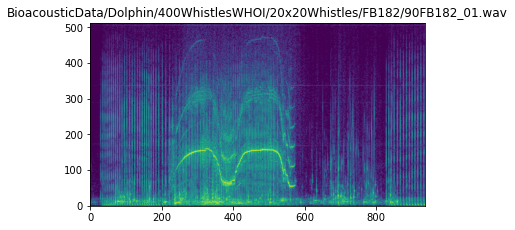

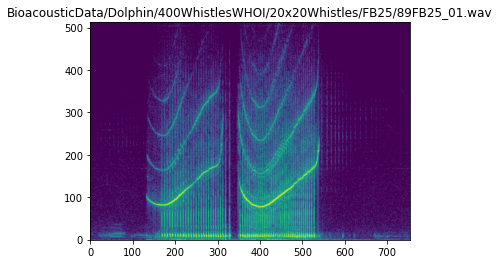

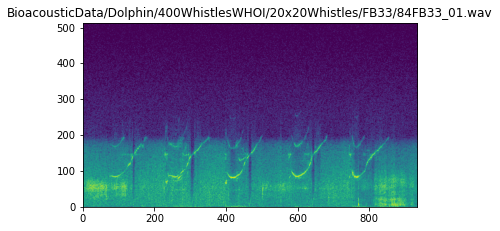

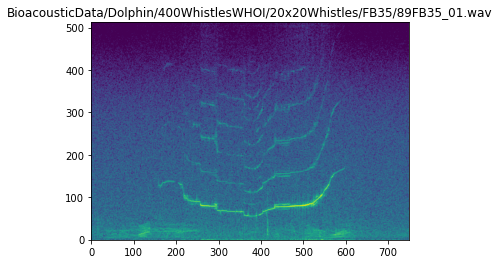

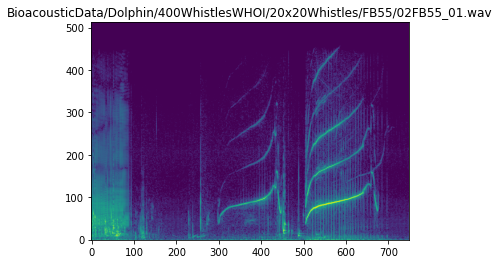

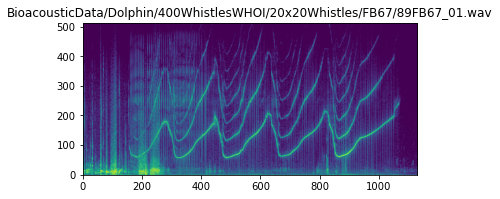

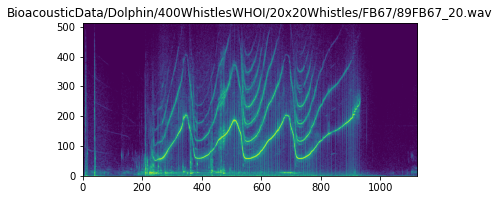

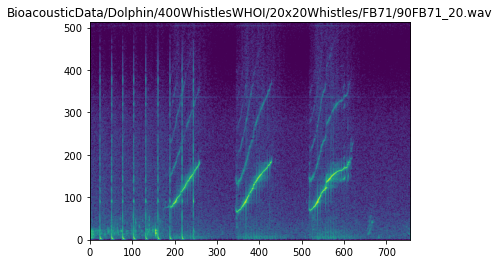

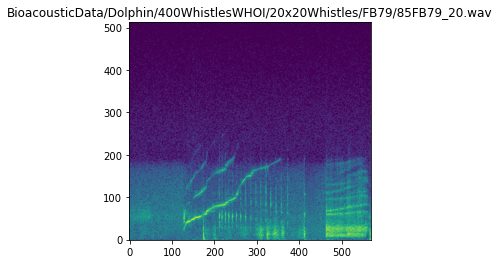

In [42]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(0, 400, 20):
    x, _ = librosa.load(wavs[i], sr=96000)
    s = gen_spec(x)
    plt.imshow(s)
    plt.title(wavs[i])
    plt.gca().invert_yaxis()
    plt.show()

In [53]:
ids_use = ['FB67', 'FB35', 'FB25', 'FB131', 'FB2', 'FB7', 'FB182', 'FB15']
ids_use.sort()

In [54]:
ids_use

['FB131', 'FB15', 'FB182', 'FB2', 'FB25', 'FB35', 'FB67', 'FB7']

In [86]:
import random
import pandas as pd
import os
import re
import soundfile as sf
class LoadDolphinData(object):
	def __init__(self, os='Ubuntu', sr=96000, n_individuals=None, frames_fx=np.max, seed=1234):
		self.os = os
		if os == 'Windows':
			self.data_path = 'BioacousticData\\Dolphin'
		else:
			self.data_path = 'BioacousticData/Dolphin'
		self.sr = sr 
		self.n_individuals = n_individuals
		self.frames_fx = frames_fx
		self.seed = seed
		random.seed(seed)
        
	def load_wavs(self):
		wavs = []
		for r, d, f in os.walk(self.data_path):
			for item in f:
				if '.wav' in item:
					wavs.append(os.path.join(r, item))
		wavs.sort()
		return wavs
	
	def generate_df(self):
		
		paths = []
		
		ids = []
		classes = []
		durs = []
		
		wav_files = self.load_wavs()
		IDs = self.get_ids(wav_files)
		id_dict = {ID:i for i, ID in enumerate(IDs)}

		for f in wav_files:
			paths.append(f)

			ID = self.get_id(f)
			ids.append(ID)
			classes.append(id_dict[ID])

			durs.append(sf.info(f).duration)
			
		df = pd.DataFrame({'Class ID':classes, 'Dolphin ID': ids, 'Wav Path': paths, 'Duration (s)': durs})
		
		if self.n_individuals is not None:
			assert type(self.n_individuals) == int

			id_list = df['Class ID'].unique().tolist()
			n_total = len(id_list)
			assert self.n_individuals < n_total

			ids_to_remove = random.sample(id_list, n_total - self.n_individuals)

			df = df[~df['Class ID'].isin(ids_to_remove)]
			print(df['Dolphin ID'].unique())
		return df
	
	def run(self):
		path_df = self.generate_df()
		frames = int(self.frames_fx(path_df['Duration (s)'].values)*self.sr)
		X, Y = [], []
		for i in range(len(path_df)):
			wav, _ = librosa.load(path_df['Wav Path'].iloc[i], sr=self.sr)
			wav = librosa.util.fix_length(wav, frames).astype('float32')
			X.append(wav)
			Y.append(path_df['Class ID'].iloc[i])
		if self.n_individuals is not None:
			Y = id_mapper(Y)    
		return X, Y
	
	def get_ids(self, files):
		ids = []
		for f in files:
			ID = self.get_id(f)
			if ID not in ids:
				ids.append(ID)
		return ids
	
	@staticmethod
	def get_id(file_name):
		pattern = 'FB\d+'
		match = re.findall(pattern, file_name)[0]
		return match

In [87]:
df = LoadDolphinData(n_individuals=8).generate_df()

['FB10' 'FB11' 'FB122' 'FB131' 'FB15' 'FB33' 'FB67' 'FB92']


In [70]:
i = 0
ids_use = ['FB67', 'FB35', 'FB25', 'FB131', 'FB02', 'FB7', 'FB182', 'FB15']
ids_use.sort()
while True:
    ids, _ = LoadDolphinData(n_individuals=8, seed=i).generate_df()
    ids = ids.tolist()
    ids.sort()
    if ids_use == ids:
        break
    i+=1
    if i % 10000 == 0:
        print(i)
print(i)
    
    

KeyboardInterrupt: 

In [60]:
a = ['1', '2']
b = ['1', '2']
a != b

False

In [50]:
df = LoadDolphinData(n_individuals=8).generate_df()

['FB02' 'FB11' 'FB122' 'FB131' 'FB33' 'FB55' 'FB71' 'FB92']


In [78]:
_, df = LoadDolphinData().generate_df()

In [79]:
df[df['Dolphin ID'].isin(['FB67', 'FB35', 'FB25', 'FB131', 'FB02', 'FB07', 'FB182', 'FB15'])]

,Class ID,Dolphin ID,Wav Path,Duration (s)
0,0,FB02,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_01.wav,1.508750
1,0,FB02,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_02.wav,1.508750
2,0,FB02,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_03.wav,1.508750
3,0,FB02,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_04.wav,1.486563
4,0,FB02,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB02/92FB2_05.wav,1.508750
...,...,...,...,...
336,16,FB67,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB67/89FB67_16.wav,2.999750
337,16,FB67,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB67/89FB67_17.wav,3.013833
338,16,FB67,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB67/89FB67_18.wav,3.013833
339,16,FB67,BioacousticData/Dolphin/400WhistlesWHOI/20x20Whistles/FB67/89FB67_19.wav,2.999750
